In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
import matplotlib

In [2]:
df = pd.concat([pd.read_csv('input/2007.csv'), pd.read_csv('input/2008.csv')])

In [3]:
df = df[df['UniqueCarrier']=='WN']
for dataset in df:
    df.loc[df['ArrDelay'] <= 15, 'Status'] = 0
    df.loc[df['ArrDelay'] >= 15, 'Status'] = 1
    df.loc[df['ArrDelay'] >= 60, 'Status'] = 2
    df.loc[df['Diverted'] == 1, 'Status'] = 3
    df.loc[df['Cancelled'] == 1, 'Status'] = 4
    
df['DepDate'] = pd.to_datetime(df.Year*10000+df.Month*100+df.DayofMonth,format='%Y%m%d')
df.index = df['DepDate']

In [ ]:
def univariate(df):

    
    categorical_columns = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 
                           'UniqueCarrier', 'TailNum', 'FlightNum',
                           'Origin', 'Dest', 'CancellationCode']
    
    for col in df.columns:
        if col in categorical_columns:
            pass
        else:
            fig = plt.figure(figsize=(16, 5))
            ax = plt.axes()
            plt.hold(True)

            bp = sns.boxplot(y=col, data=df, palette='RdBu_r')
            plt.title('Boxplots of feature '+col, fontsize=20)
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            plt.axes().get_yaxis().get_label().set_visible(False)
            plt.axes().get_xaxis().get_label().set_visible(False)
            L=plt.legend(fontsize=14, loc=2)
            plt.show()
            plt.close()

In [ ]:
univariate(df)

In [ ]:
def bivariate(df):
    
    categorical_columns = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 
                           'UniqueCarrier', 'TailNum', 'FlightNum',
                           'Origin', 'Dest', 'CancellationCode']

    columns_all = df.columns.tolist()         #columns in every dataframe are the same
    columns_keep = set(columns_all) - set(categorical_columns)
    
    cor = df[list(columns_keep)].corr()
    
    fig = plt.figure(figsize=(30, 30))
    hm = sns.heatmap(cor, annot=True, fmt=".2f", cmap='RdBu_r')
    plt.title('Heatmap of features for SowthWest carrier', fontsize=35)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25, rotation=0)
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=25)
    plt.show()
    
    cor = df[list(columns_keep)].corr().abs()
    mask = np.zeros_like(cor)
    mask[np.triu_indices_from(mask)] = True
    cor = cor*mask
    np.fill_diagonal(cor.values, -2)
    s = cor.unstack()
    s= s.sort_values(ascending=False)
    df_corr = pd.DataFrame(s, columns=['Correlation'])
    df_corr = df_corr.sort_values(by='Correlation', ascending=False)
    df_corr = df_corr[df_corr['Correlation']>0.7]
    print('Table of features Pearson correlation coefficients (corr > 0.7) for Sowthwest airlines\n')
    print(df_corr)

In [ ]:
bivariate(df)

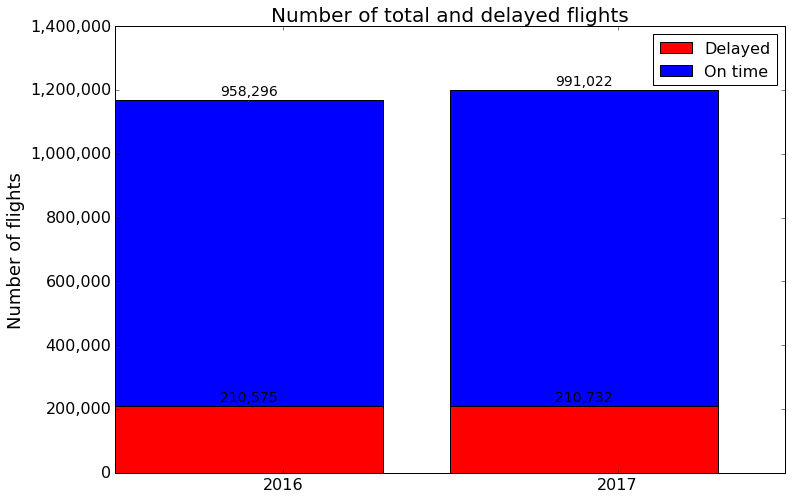

In [42]:
y1 = df[df['ArrDelay']>15][['Year','ArrDelay']].groupby(['Year']).count()
y2 = df[['Year', 'Month']].groupby(['Year']).count()

width = 0.35 

fig = plt.figure(figsize=(12, 8))


p1 = plt.bar(y1.index, y1.values.reshape(2,),color='red')
p2 = plt.bar(y2.index, (y2.values.reshape(2,) - y1.values.reshape(2,)),
             bottom=y1.values, color='blue')

plt.ylabel('Number of flights', fontsize=18)
plt.title('Number of total and delayed flights', fontsize=20)
plt.legend(['Delayed', 'On time'], fontsize=16)
plt.xticks(y1.index+0.5,('2016', '2017'), fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for bar1 in p1:
    plt.gca().text(bar1.get_x() + bar1.get_width()/2,
                    bar1.get_height() + 15000, format(int(bar1.get_height()), ','),
                    ha='center', color='black', fontsize=16)
i=0
for bar2 in p2:
    plt.gca().text(bar2.get_x() + bar2.get_width()/2,
                    bar2.get_height() + y1.values[i] + 15000, format(int(bar2.get_height()), ','),
                    ha='center', color='black', fontsize=16)
    
plt.show()

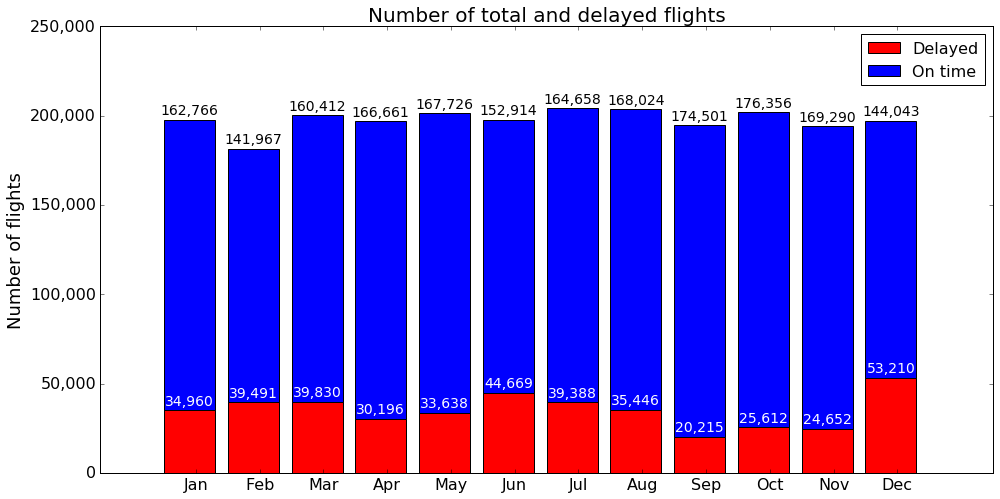

In [48]:
y1 = df[df['ArrDelay']>15][['Month','ArrDelay']].groupby(['Month']).count()
y2 = df[['Year', 'Month']].groupby(['Month']).count()

width = 0.35 

fig = plt.figure(figsize=(16, 8))

Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

p1 = plt.bar(y1.index, y1.values,color='red')
p2 = plt.bar(y2.index, (y2.values - y1.values),
             bottom=y1.values, color='blue')

plt.ylabel('Number of flights', fontsize=18)
plt.title('Number of total and delayed flights', fontsize=20)
plt.legend(['Delayed', 'On time'], fontsize=16)
plt.xticks(y1.index+0.5,(Months), fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for bar1 in p1:
    plt.gca().text(bar1.get_x() + bar1.get_width()/2,
                    bar1.get_height() + 3000, format(int(bar1.get_height()), ','),
                    ha='center', color='white', fontsize=14)
i=0
for bar2 in p2:
    plt.gca().text(bar2.get_x() + bar2.get_width()/2,
                    bar2.get_height() + y1.values[i] + 3000, format(int(bar2.get_height()), ','),
                    ha='center', color='black', fontsize=14)
    i+=1

plt.show()

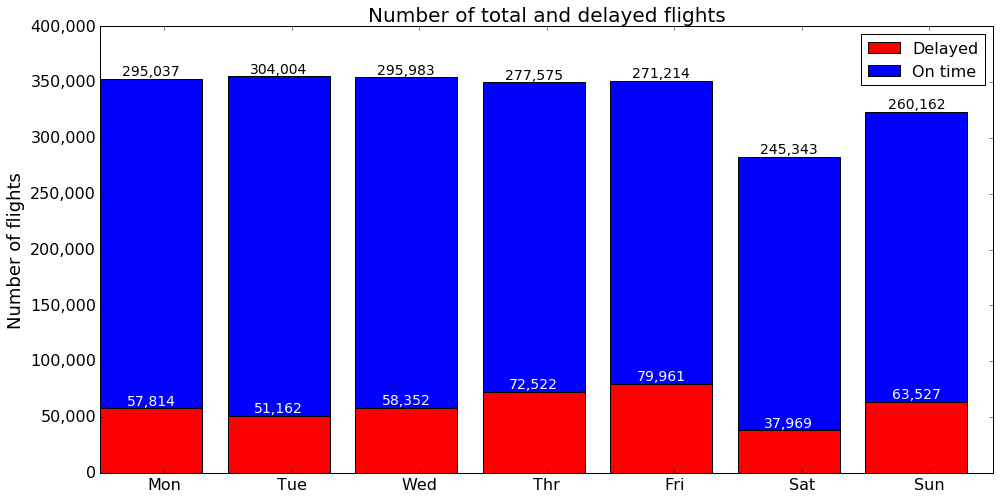

In [53]:
y1 = df[df['ArrDelay']>15][['ArrDelay']].groupby([df[df['ArrDelay']>15].index.dayofweek]).count()
y2 = df[['Month']].groupby([df.index.dayofweek]).count()

width = 0.35 

fig = plt.figure(figsize=(16, 8))

Days = ['Mon', 'Tue', 'Wed', 'Thr', 'Fri', 'Sat', 'Sun']

p1 = plt.bar(y1.index, y1.values,color='red')
p2 = plt.bar(y2.index, (y2.values - y1.values),
             bottom=y1.values, color='blue')

plt.ylabel('Number of flights', fontsize=18)
plt.title('Number of total and delayed flights', fontsize=20)
plt.legend(['Delayed', 'On time'], fontsize=16)
plt.xticks(y1.index+0.5,(Days), fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for bar1 in p1:
    plt.gca().text(bar1.get_x() + bar1.get_width()/2,
                    bar1.get_height() + 3000, format(int(bar1.get_height()), ','),
                    ha='center', color='white', fontsize=14)
i=0
for bar2 in p2:
    plt.gca().text(bar2.get_x() + bar2.get_width()/2,
                    bar2.get_height() + y1.values[i] + 3000, format(int(bar2.get_height()), ','),
                    ha='center', color='black', fontsize=14)
    i+=1

plt.show()

In [52]:
df.dayofweek

AttributeError: 'DataFrame' object has no attribute 'dayofweek'